# Figure Seven: Alpha & Proton Composition

- Panel (a): Alpha-to-Proton Abundance Ratio ($\rm N_{\alpha}/N_p$)
- Panel (b): Normalized Alpha-to Proton Differential Velocity ($\rm \frac{|v_{\alpha} - v_p|}{v_A}$)
- Panel (c): Scaled Proton to Alpha Abundance ($\rm N_{\alpha}R^2 \; v. \; N_p R^2$)

## Imports

In [4]:
import os

import datetime

import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as stats

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import tools.utilities as utils

# COLORS
c = ['#ae017e','#085A99',  '#c98000'] # darker colors
lightc = ['#FCA4C4',  '#8FD3F4', '#FFCC70'] # lighter colors
fcol = 'mistyrose'
sacol = 'violet'
f2col = 'lightgreen'
hcol = 'lightblue'
aa = 0.6
lw=2
clon = '#ae017e'
clat = '#085A99'
rcol = 'dimgrey'
cmaps = ['RdPu', 'cool', 'Wistia', 'spring']

# REGIONS
loc_hcs = [113, 116]
fsw2 = [125, 135]
sasw = [175, 185]
fsw = [70, 85]

# DIRECTORIES
IMG_DIR = './figures'
DF_DIR = './results'
PlotDir = '/Users/tamarervin/mplstyle/'
RES_DIR = 'results'

# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 18})
plt.style.use(plot_style)

## Data

In [5]:
# ### READ IN DATA ###
parker, parkerdownt, parkerdownl, pss, orbiter, orbiterdownl, orbiterdownt, oss, his_orbiter, his_orbiterdownt, his_orbiterdownl = utils.read_data(RES_DIR, sigma_time=20)
parker['NaR2'] = parker.Na * (parker.rAU**2)
### DEFINE REGIONS ###
lon_footpoints = parker.sslon
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
salf = np.logical_and(lon_footpoints >=sasw[0], lon_footpoints <=sasw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])
fast2 = np.logical_and(lon_footpoints >=fsw2[0], lon_footpoints <=fsw2[1])


/Users/tamarervin/publications/e11_ch/tools/utilities.py:180: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  pss = parker.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()
/Users/tamarervin/publications/e11_ch/tools/utilities.py:180: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pss = parker.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()
/Users/tamarervin/publications/e11_ch/tools/utilities.py:189: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")


In [15]:
### correlations
import scipy.stats as stats

dd = parker
df = pd.DataFrame()
df['diff'] = dd.vap
df['vr'] = dd.vr
df['sslon'] = dd.sslon
df = df.dropna()
lon_footpoints = df.sslon
fast = np.logical_and(lon_footpoints >= fsw[0], lon_footpoints <=fsw[1])
salf = np.logical_and(lon_footpoints >= sasw[0], lon_footpoints <=sasw[1])
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
fast2 = np.logical_and(lon_footpoints >= fsw2[0], lon_footpoints <=fsw2[1])
corr1 = stats.spearmanr(df['diff'][fast], df.vr[fast])[0]
print("FSW", corr1)
corr1 = stats.spearmanr(df['diff'][fast2], df.vr[fast2])[0]
print("FSW2", corr1)
corr1 = stats.spearmanr(df['diff'][salf], df.vr[salf])[0]
print("SSW", corr1)
corr1 = stats.spearmanr(df['diff'], df.vr)[0]
print("All", corr1)
corr1 = stats.spearmanr(parker['vra'], parker.vr)[0]
print("All", corr1)

FSW 0.8899294074689303
FSW2 0.6347075072132206
SSW 0.598545704907483
All 0.7423998174886441
All 0.9051783196288871


# Figure Seven: Density and Velocity Figure

In [6]:
df = parker
bin_size = pd.Timedelta(seconds=30)
df = df.resample(bin_size, closed='left', label='left', loffset=bin_size / 2).mean()
df['NaR2'] = df.Na * (df.rAU**2)

lon_footpoints = df.sslon
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
salf = np.logical_and(lon_footpoints >=sasw[0], lon_footpoints <=sasw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])
fast2 = np.logical_and(lon_footpoints >=fsw2[0], lon_footpoints <=fsw2[1])

df['period'] = np.nan * len(df)
df.loc[hhcs, 'period'] = 'hcs'
df.loc[salf, 'period'] = 'sasw'
df.loc[fast, 'period'] = 'fsw'
df.loc[fast2, 'period'] = 'fsw2'

/var/folders/by/lx780c7j7w58m_tkpc3q83kc0000gn/T/ipykernel_10914/86459632.py:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df = df.resample(bin_size, closed='left', label='left', loffset=bin_size / 2).mean()
/var/folders/by/lx780c7j7w58m_tkpc3q83kc0000gn/T/ipykernel_10914/86459632.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample(bin_size, closed='left', label='left', loffset=bin_size / 2).mean()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


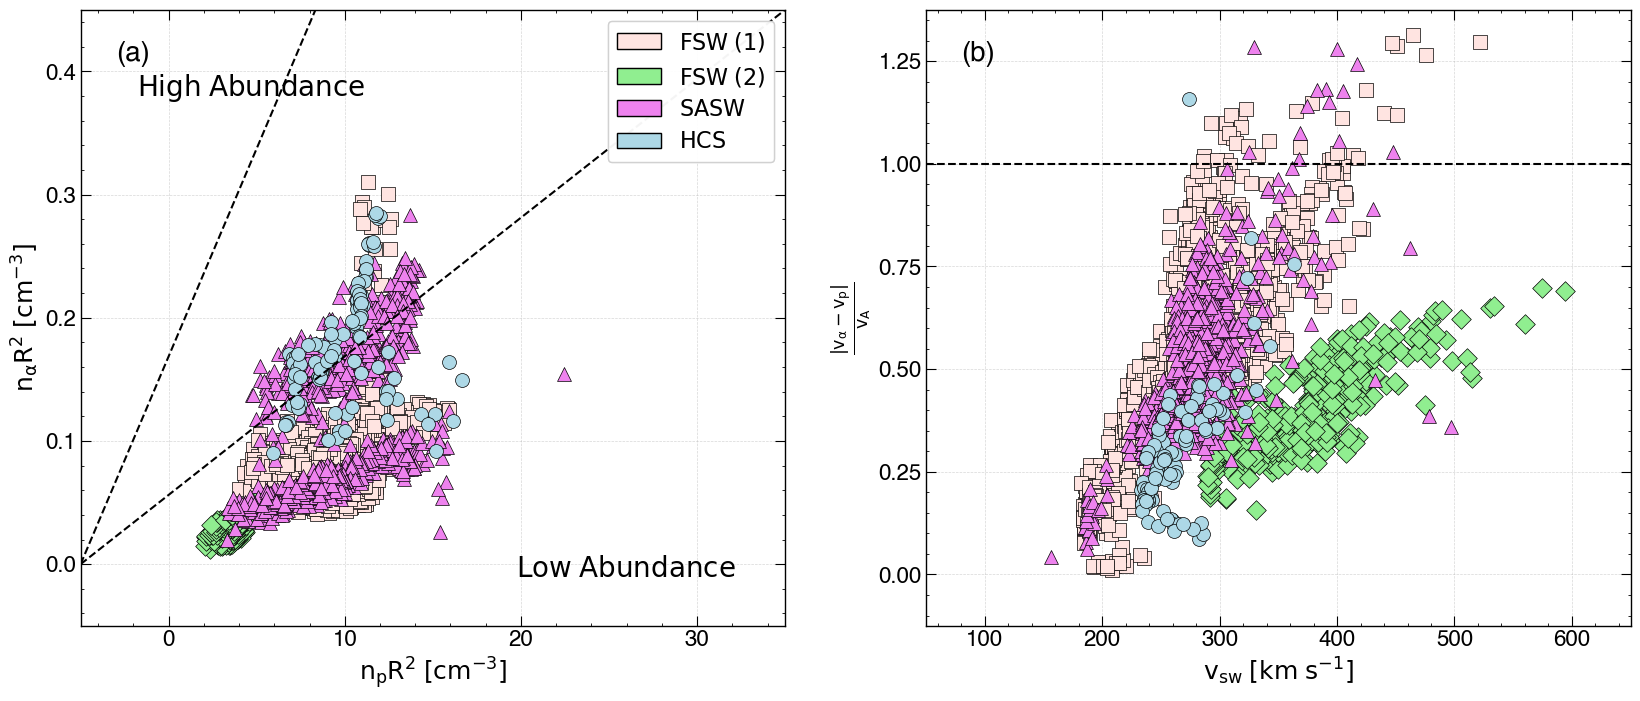

In [7]:
# Set up the figure
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

### LABELS
ylabel_list = [r'$\rm n_{\alpha} / n_p$', r'$\rm \frac{|v_{\alpha} - v_p|}{v_A}$']

#### regions
regions = ['fsw', 'fsw2', 'sasw', 'hcs']
colors = [fcol, f2col, sacol, hcol]
ms = ['s', 'D', '^', 'o']
ss=100

##### ---------- PANEL (A): ALPHA-TO-PROTON ABUNDANCE  ---------- ######
ax = axs[0]
ax.set_xlabel(r'$\rm n_p R^2 \; [cm^{-3}]$', fontsize=18)
ax.set_ylabel(r'$\rm n_{\alpha} R^2 \; [cm^{-3}]$', fontsize=18)
ax.set(xlim=(-5, 35), xticks=np.arange(0, 31, step=10))
ax.set(ylim=(-0.05, 0.45), yticks=np.arange(0, 0.41, step=0.1))
ax.tick_params(axis='both', which='major', labelsize=16) 

ax.plot(np.linspace(-5, 35), np.linspace(0, 30)*0.015, color='k', linestyle='dashed')
ax.plot(np.linspace(-5, 35), np.linspace(0, 30)*0.045, color='k', linestyle='dashed')
ax.text(0.08, 0.9, r'$\rm High \; Abundance$', transform=ax.transAxes, fontsize=20, va='top')
ax.text(0.93, 0.08, r'$\rm Low \; Abundance$', transform=ax.transAxes, fontsize=20, ha='right')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.text(0.05, 0.95, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

### PLOTTING
for j, reg in enumerate(regions):
    x = df['NpR2'][df['period']==reg]
    y = df['NaR2'][df['period']==reg]
    ax.scatter(x, y, color=colors[j], edgecolor='k', s=ss, linewidth=0.5, label=reg, marker=ms[j])  

### LEGEND 
fswp = mpatches.Patch(edgecolor='k', facecolor=fcol, label=r'$\rm FSW \; (1)$')
fsw2p = mpatches.Patch(edgecolor='k', facecolor=f2col,  label=r'$\rm FSW \; (2)$')
saswp = mpatches.Patch(edgecolor='k', facecolor=sacol,  label=r'$\rm SASW$')
hcsp = mpatches.Patch(edgecolor='k', facecolor=hcol,  label=r'$\rm HCS$')
leg0 = ax.legend(handles=[fswp, fsw2p, saswp, hcsp], loc='upper right', fontsize=16)
ax.add_artist(leg0)

##### ---------- PANEL (B): ALPHA-TO-PROTON DIFFERENTIAL VELOCITY  ---------- ######
ax2 = axs[1]
ax2.set_xlabel(r'$\rm v_{sw} \; [km \; s^{-1}]$', fontsize=18)
ax2.set_ylabel(r'$\rm \frac{|v_{\alpha} - v_p|}{v_A}$', fontsize=18)
ax2.set(xlim=(50, 650), xticks=np.arange(100, 601, step=100))
ax2.set(ylim=(-0.125, 1.375), yticks=np.arange(0, 1.26, step=0.25))
ax2.tick_params(axis='both', which='major', labelsize=16) 
ax2.axhline(1, color='k', linestyle='dashed')
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax2.text(0.05, 0.95, '(b)', transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

### plot some correlations
# ax2.plot(x_fit_sasw, y_fit_sasw, c='k', linestyle='dashed')
# ax2.plot(x_fit_fsw, y_fit_fsw, c='k', linestyle='dashed')
# ax2.plot(x_fit_fsw2, y_fit_fsw2, c='k', linestyle='dashed')

##### ---------- PLOTTING  ---------- ######
for j, reg in enumerate(regions):
    x = df['vr'][df['period']==reg] 
    y = df['diff'][df['period']==reg]
    ax2.scatter(x, y, color=colors[j], edgecolor='k', s=ss, linewidth=0.5, label=reg, marker=ms[j])  

### SAVE FIGURE
fig.savefig('figures/fig7.png', bbox_inches='tight')  # Save the figure as PNG
fig.savefig('eps_figures/fig7.eps', bbox_inches='tight')  # Save the figure as EPS
plt.show()


# random

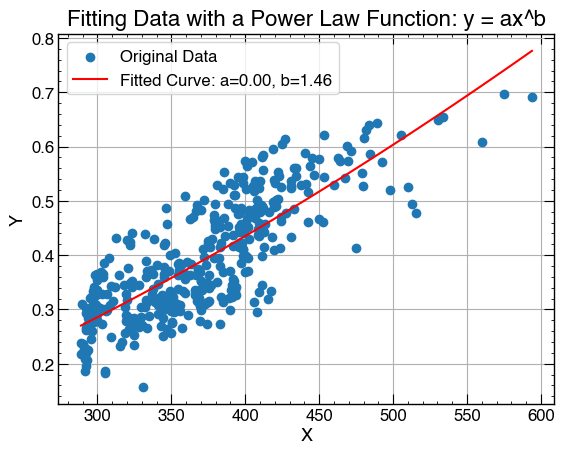

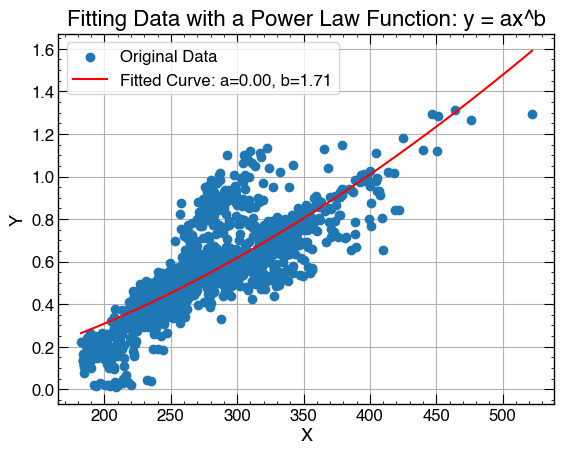

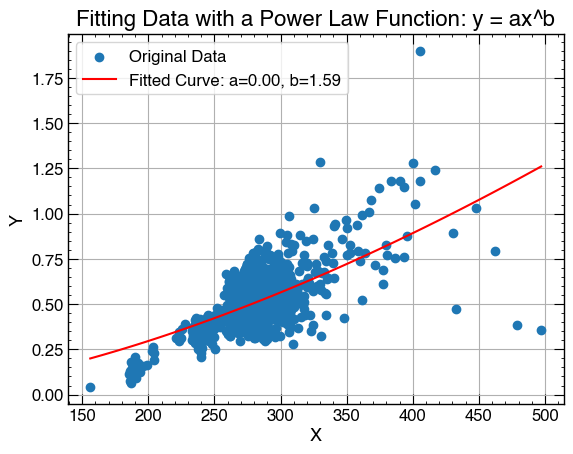

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate sample data
x_data= df['vr'][df['period']=='fsw2'] 
y_data = df['diff'][df['period']=='fsw2']

# Define the function to fit (y = ax^b)
def power_law(x, a, b):
    return a * x**b

# Perform the curve fitting
popt, pcov = curve_fit(power_law, x_data, y_data)

# Extract the optimized parameters
a_fit, b_fit = popt

# Generate fitted data for plotting
x_fit_fsw2 = np.linspace(min(x_data), max(x_data), 100)
y_fit_fsw2 = power_law(x_fit_fsw2, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit_fsw2, y_fit_fsw2, 'r-', label=f'Fitted Curve: a={a_fit:.2f}, b={b_fit:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Data with a Power Law Function: y = ax^b')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate sample data
x_data= df['vr'][df['period']=='fsw'] 
y_data = df['diff'][df['period']=='fsw']

# Define the function to fit (y = ax^b)
def power_law(x, a, b):
    return a * x**b

# Perform the curve fitting
popt, pcov = curve_fit(power_law, x_data, y_data)

# Extract the optimized parameters
a_fit, b_fit = popt

# Generate fitted data for plotting
x_fit_fsw = np.linspace(min(x_data), max(x_data), 100)
y_fit_fsw = power_law(x_fit_fsw, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit_fsw, y_fit_fsw, 'r-', label=f'Fitted Curve: a={a_fit:.2f}, b={b_fit:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Data with a Power Law Function: y = ax^b')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate sample data
x_data= df['vr'][df['period']=='sasw'] 
y_data = df['diff'][df['period']=='sasw']

# Define the function to fit (y = ax^b)
def power_law(x, a, b):
    return a * x**b

# Perform the curve fitting
popt, pcov = curve_fit(power_law, x_data, y_data)

# Extract the optimized parameters
a_fit, b_fit = popt

# Generate fitted data for plotting
x_fit_sasw = np.linspace(min(x_data), max(x_data), 100)
y_fit_sasw = power_law(x_fit_sasw, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit_sasw, y_fit_sasw, 'r-', label=f'Fitted Curve: a={a_fit:.2f}, b={b_fit:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Data with a Power Law Function: y = ax^b')
plt.legend()
plt.grid(True)
plt.show()

